## XGBoost Regression

In [1]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
data = pd.read_excel("OSA_extreme_male.xlsx")
df_OSA_male = pd.DataFrame(data)

In [3]:
features = ['Age','Cervical','BMI']

In [4]:
# Creating X and y
X = df_OSA_male[features]
y = df_OSA_male['IAH']

In [5]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [7]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [8]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [9]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds))) 
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('R-Squared:', r2_score(y_test, preds))

RMSE: 10.895542819431267
MAE: 8.64307330623269
R-Squared: -0.35472800003211447


### k-fold Cross Validation using XGBoost

In [10]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [11]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,13.712352,0.298015,13.725440,0.654102
1,12.820764,0.281432,12.869885,0.661018
2,12.056464,0.265925,12.130492,0.660681
3,11.360621,0.237956,11.491670,0.647499
4,10.783316,0.229777,10.943009,0.628456


In [12]:
print((cv_results["test-rmse-mean"]).tail(1))

27    8.153617
Name: test-rmse-mean, dtype: float64


### Visualize Boosting Trees and Feature Importance

In [13]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

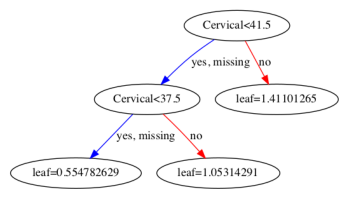

In [14]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

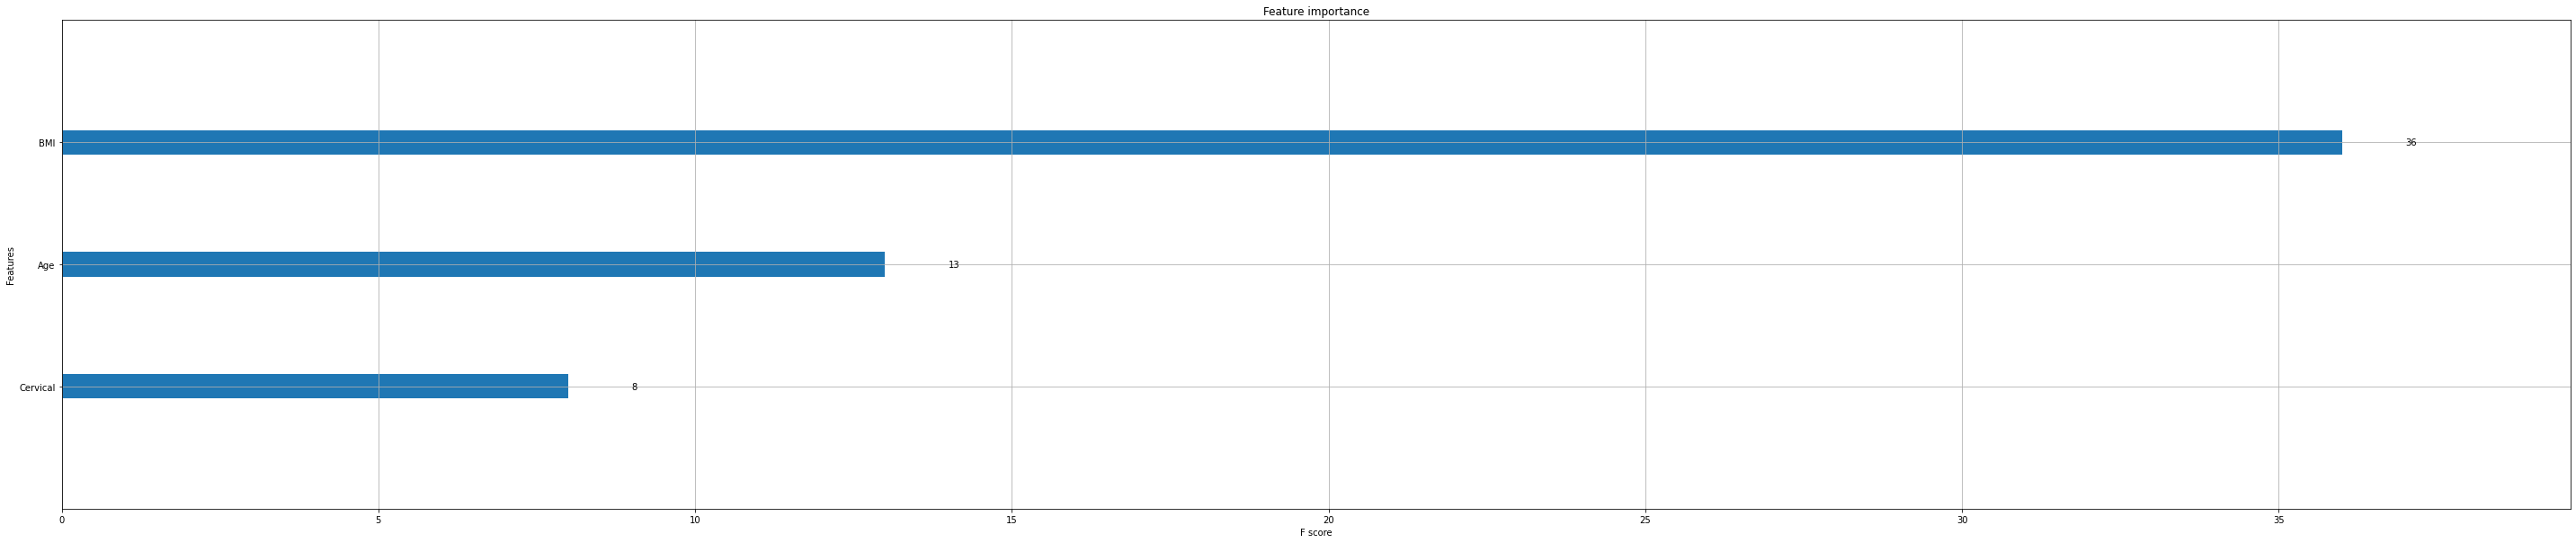

In [15]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()